# Applying SMOTE on the imbalanced data

In [37]:
import pandas as pd
day_6 = pd.read_csv('train/02-22-2018_clean.csv')
day_7 = pd.read_csv('train/02-23-2018_clean.csv')

In [38]:
day_6.shape

(836237, 71)

In [39]:
day_7.shape

(836768, 71)

In [40]:
day_6["Label"].unique()

array([0, 2, 5])

In [41]:
print(day_6["Label"].value_counts()[[0]].sum())
print(day_6["Label"].value_counts()[[2]].sum())
print(day_6["Label"].value_counts()[[5]].sum())

835946
265
26


In [42]:
day_7["Label"].unique()

array([0, 2, 5])

In [43]:
print(day_7["Label"].value_counts()[[0]].sum())
print(day_7["Label"].value_counts()[[2]].sum())
print(day_7["Label"].value_counts()[[5]].sum())

836307
421
40


In [44]:
day_6 = day_6.astype('int64')
day_7 = day_7.astype('int64')

In [19]:
from imblearn.over_sampling import BorderlineSMOTE

# Split the dataset into features and target variable
X = day_6.drop('Label', axis=1)
y = day_6['Label']

# Create a BorderlineSMOTE object
borderline_smote = BorderlineSMOTE(random_state=42, k_neighbors=12)

# Apply BorderlineSMOTE to the dataset
X_resampled, y_resampled = borderline_smote.fit_resample(X, y)

# Concatenate the resampled data into a new DataFrame
resampled_day_6 = pd.concat([pd.DataFrame(X_resampled), pd.Series(y_resampled)], axis=1)
resampled_day_6.columns = day_6.columns

# Print the value counts of the target variable in the resampled data
print(resampled_day_6['Label'].value_counts())


0    835946
2    835946
5    835946
Name: Label, dtype: int64


In [20]:
from imblearn.over_sampling import BorderlineSMOTE

# Split the dataset into features and target variable
X = day_7.drop('Label', axis=1)
y = day_7['Label']

# Create a BorderlineSMOTE object
borderline_smote = BorderlineSMOTE(random_state=42, k_neighbors=12)

# Apply BorderlineSMOTE to the dataset
X_resampled, y_resampled = borderline_smote.fit_resample(X, y)

# Concatenate the resampled data into a new DataFrame
resampled_day_7 = pd.concat([pd.DataFrame(X_resampled), pd.Series(y_resampled)], axis=1)
resampled_day_7.columns = day_6.columns

# Print the value counts of the target variable in the resampled data
print(resampled_day_7['Label'].value_counts())


0    836307
2    836307
5    836307
Name: Label, dtype: int64


In [54]:
# concatenate sampled dataframes into a single dataframe
data = pd.concat([day_6, day_7], ignore_index=True)

In [22]:
import numpy as np
print(data.isna().sum())
print(np.isinf(data).sum())

Dst Port         0
Protocol         0
Flow Duration    0
Tot Fwd Pkts     0
Tot Bwd Pkts     0
                ..
Idle Max         0
Idle Min         0
Date             0
Time             0
Label            0
Length: 71, dtype: int64
Dst Port         0
Protocol         0
Flow Duration    0
Tot Fwd Pkts     0
Tot Bwd Pkts     0
                ..
Idle Max         0
Idle Min         0
Date             0
Time             0
Label            0
Length: 71, dtype: int64


In [23]:
data = data.fillna(data.mean())

In [24]:
data.dropna(inplace=True)

In [25]:
data = data.astype('int64')

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# assuming "data" is your dataset and "label" is the column containing the labels
X = data.drop('Label', axis=1)
y = data['Label']

# split the dataset into training and testing sets with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create an AdaBoostClassifier with decision tree as the base estimator
clf = AdaBoostClassifier(n_estimators=50, base_estimator=DecisionTreeClassifier())

# train the classifier on the "train" dataset
clf.fit(X_train, y_train)

# predict the labels of the "test" dataset using the trained classifier
y_pred = clf.predict(X_test)

# evaluate the performance of the classifier on the "test" dataset using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.999928272778623


In [56]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

# calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Precision: [0.99998206 0.         0.00819672 0.        ]
Recall: [0.99999402 0.         0.0625     0.        ]
F1-score: [0.99998804 0.         0.01449275 0.        ]
Confusion Matrix:
[[334457      0      2      0]
 [     6      0    119      1]
 [     0      0      1     15]
 [     0      0      0      0]]


/Users/anshujlayan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anshujlayan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

Accuracy: 0.9995726253059615
Precision: 0.9995580743013255
Recall: 0.9995726253059615
F1-score: 0.9995643524914066


/Users/anshujlayan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anshujlayan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
print(cm)

[[334457      0      2      0]
 [     6      0    119      1]
 [     0      0      1     15]
 [     0      0      0      0]]


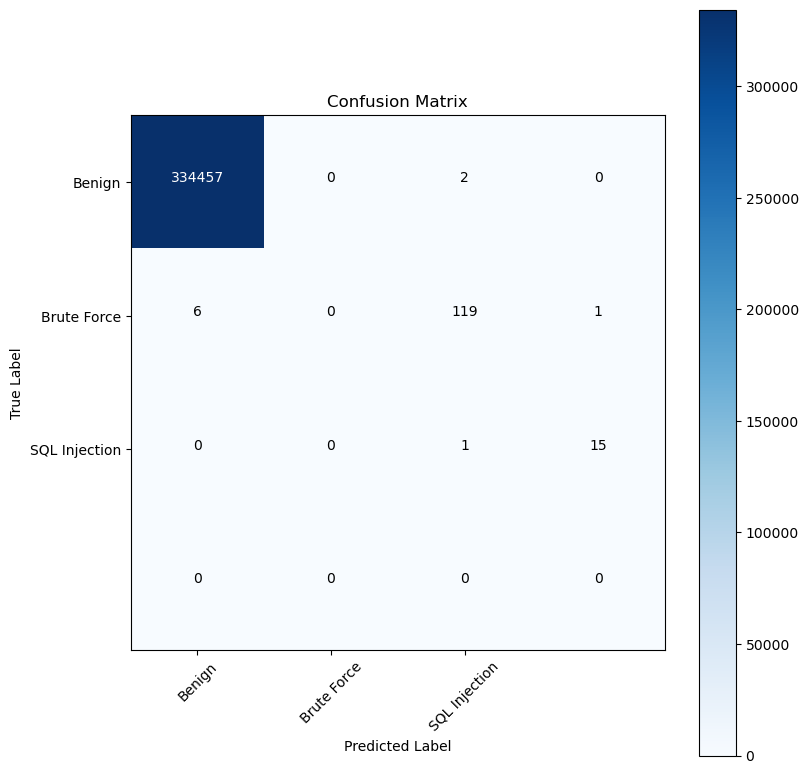

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# assuming "y_test" and "y_pred" are the ground truth labels and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred)

# define class labels
class_names = ['Benign', 'Brute Force', 'SQL Injection']

# plot the confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# plot the text annotations
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()



In [60]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Load the 'test.csv' dataset into a pandas dataframe
test_data = pd.read_csv('test/test.csv')
test_data = test_data.astype('int64')
# Preprocess the data (e.g., remove missing values, encode categorical variables, etc.)
# ...
desired_labels = [0, 2, 5]
test_data = test_data[test_data['Label'].isin(desired_labels)]

# Split the preprocessed 'test' data into X_test and y_test
X_test = test_data.drop('Label', axis=1)
y_test = test_data['Label']

# Use the trained model to predict the labels of X_test
y_pred = clf.predict(X_test)

# Compare the predicted labels with the true labels (y_test) and compute the accuracy
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy on test data:', accuracy)


Accuracy on test data: 0.9878044879631362


In [61]:
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

Accuracy: 0.9878044879631362
Precision: 0.9769731437896063
Recall: 0.9878044879631362
F1-score: 0.9823589605851899


/Users/anshujlayan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anshujlayan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


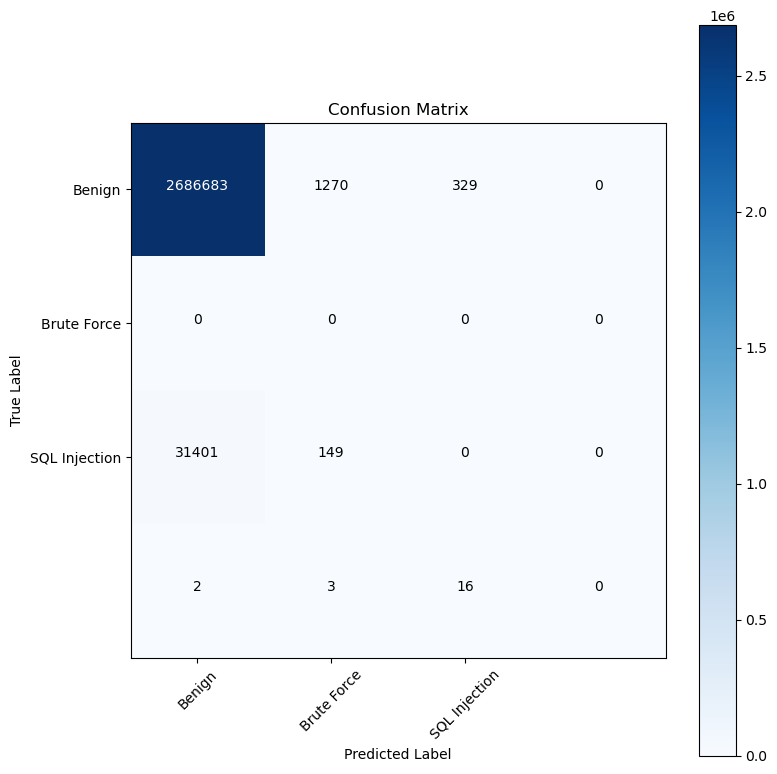

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# assuming "y_test" and "y_pred" are the ground truth labels and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred)

# define class labels
class_names = ['Benign', 'Brute Force', 'SQL Injection']

# plot the confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# plot the text annotations
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [1]:
import sys
print(sys.version)


3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]


In [2]:
import sys
print(sys.path)


['/Users/anshujlayan/Documents/GitHub/netwok_anomaly_detection', '/Users/anshujlayan/opt/anaconda3/lib/python39.zip', '/Users/anshujlayan/opt/anaconda3/lib/python3.9', '/Users/anshujlayan/opt/anaconda3/lib/python3.9/lib-dynload', '', '/Users/anshujlayan/opt/anaconda3/lib/python3.9/site-packages', '/Users/anshujlayan/opt/anaconda3/lib/python3.9/site-packages/aeosa', '/Users/anshujlayan/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions', '/Users/anshujlayan/.ipython']


# XGBoost

In [55]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
import numpy as np

# assuming "data" is your dataset and "label" is the column containing the labels
X = data.drop('Label', axis=1)
y = data['Label']

# Convert custom class labels to a consecutive range starting from 0
custom_labels = [0, 2, 5]
label_mapping = {label: idx for idx, label in enumerate(custom_labels)}
y = np.array([label_mapping[label] for label in y])

# split the dataset into training and testing sets with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create an XGBoost classifier
clf = xgb.XGBClassifier()

# train the classifier on the "train" dataset
clf.fit(X_train, y_train)

# predict the labels of the "test" dataset using the trained classifier
y_pred = clf.predict(X_test)

# convert predicted labels back to the original custom class labels
y_pred = np.array([custom_labels[label] for label in y_pred])

# evaluate the performance of the classifier on the "test" dataset using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9995726253059615


In [6]:
!/Users/anshujlayan/opt/anaconda3/bin/python -m pip install numpy pandas scikit-learn matplotlib seaborn xgboost


In [7]:
import sys
print(sys.executable)


/Users/anshujlayan/opt/anaconda3/bin/python


In [8]:
import sys
print(sys.version)


3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]


In [9]:
!pip3 install xgboost

In [10]:
import xgboost as xgb

In [78]:
df = day_6.sample(frac=0.01, random_state=42)

In [45]:
from imblearn.combine import SMOTETomek

# Split the dataset into features and target variable
X = df.drop('Label', axis=1)
y = df['Label']

# Create a SMOTETomek object
smote_tomek = SMOTETomek(random_state=42, sampling_strategy='minority', k_neighbors_ratio=0.5)

# Apply SMOTE-Tomek to the dataset
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# Concatenate the resampled data into a new DataFrame
resampled_df = pd.concat([pd.DataFrame(X_resampled), pd.Series(y_resampled)], axis=1)
resampled_df.columns = df.columns

# Print the value counts of the target variable in the resampled data
print(resampled_df['Label'].value_counts())



NameError: name 'df' is not defined

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# assuming "data" is your dataset and "label" is the column containing the labels
X = data1.drop('Label', axis=1)
y = data1['Label']

# split the dataset into training and testing sets with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create an AdaBoostClassifier with decision tree as the base estimator
newModel = AdaBoostClassifier(n_estimators=50, base_estimator=DecisionTreeClassifier())

# train the classifier on the "train" dataset
newModel.fit(X_train, y_train)

# predict the labels of the "test" dataset using the trained classifier
y_pred = newModel.predict(X_test)

# evaluate the performance of the classifier on the "test" dataset using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9913502109704642


In [117]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9925    0.9983    0.9954   2688282
           1     0.9999    0.9992    0.9995     56613
           2     0.9999    0.9963    0.9981     31550
           3     1.0000    0.9998    0.9999    350965
           4     0.7324    0.3853    0.5050     32524
           5     0.5000    0.0476    0.0870        21

    accuracy                         0.9921   3159955
   macro avg     0.8708    0.7378    0.7641   3159955
weighted avg     0.9909    0.9921    0.9909   3159955



In [ ]:
# day_1 = pd.read_csv("train/02-14-2018_clean.csv")
# day_2 = pd.read_csv("train/02-15-2018_clean.csv")
# day_3 = pd.read_csv("train/02-16-2018_clean.csv")
# day_4 = pd.read_csv("train/02-20-2018_clean.csv")
# day_5 = pd.read_csv("train/02-21-2018_clean.csv")
# day_8 = pd.read_csv("train/02-28-2018_clean.csv")
# day_9 = pd.read_csv("train/03-01-2018_clean.csv")
# day_10 = pd.read_csv("train/03-02-2018_clean.csv")